## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## 1-Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [1]:
import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

# Callibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


NameError: name 'undistortImage' is not defined

---
## 2-Apply a distortion correction to raw images.

Text(0.5, 1.0, 'Undistorted Image')

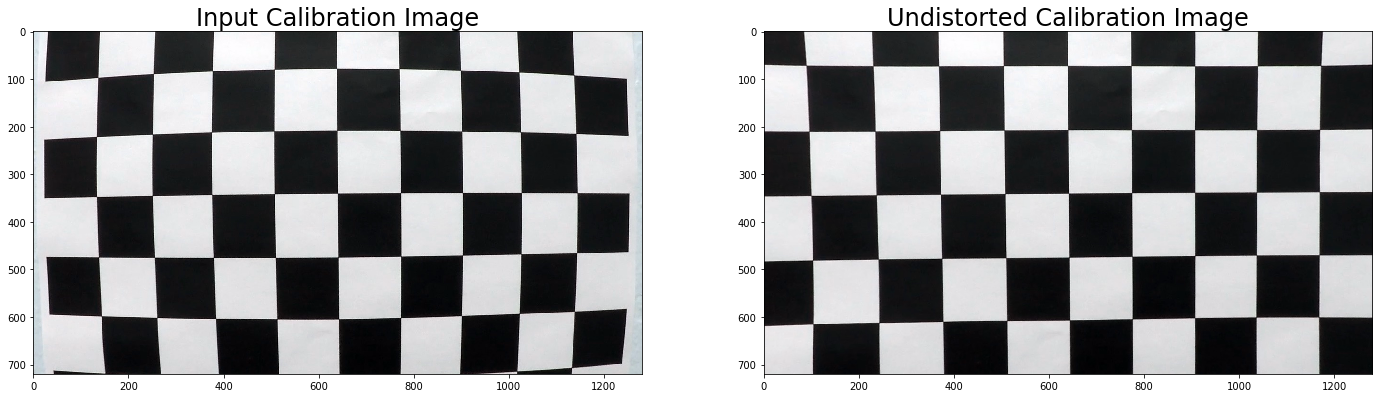

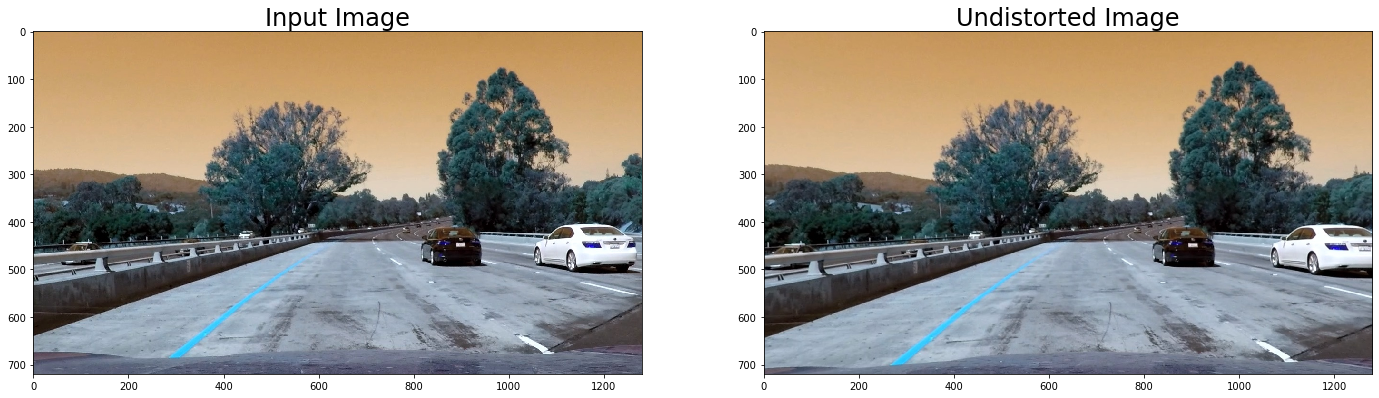

In [3]:
# Create a undistort image function
# Takes as input:
#  image: input image
#  objpoints: object points from camera calibration
#  imgpoints: image points from camera calibration
# Output: an undistorted image
def undistortImage(imgIn, objpoints, imgpoints):
    gray = cv2.cvtColor(imgIn,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return cv2.undistort(imgIn, mtx, dist, None, mtx)

# Show the undistorted test image
imgTest = cv2.imread('camera_cal/calibration1.jpg')
imgUndist = undistortImage(imgTest, objpoints, imgpoints)
# Display the results
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(imgTest)
ax1.set_title('Input Calibration Image', fontsize=24)
ax2.imshow(imgUndist)
ax2.set_title('Undistorted Calibration Image', fontsize=24)

# Test the undistort function
imgTest = cv2.imread('test_images/test1.jpg')
imgUndist = undistortImage(imgTest, objpoints, imgpoints)
# Display the results
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(imgTest)
ax1.set_title('Input Image', fontsize=24)
ax2.imshow(imgUndist)
ax2.set_title('Undistorted Image', fontsize=24)

In [4]:
# Undistort all images in test_images directory and save the result into output_images directory.
basepath = "./test_images/"
for file in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, file)):
        imgIn = cv2.imread(os.path.join('test_images', file))
        imgOut = undistortImage(imgIn, objpoints, imgpoints)
        outputFileName = './output_images/' + file.split('.')[0] + '.jpg'
        cv2.imwrite(outputFileName, imgOut)

---
## 3-Use color transforms, gradients, etc., to create a thresholded binary image.


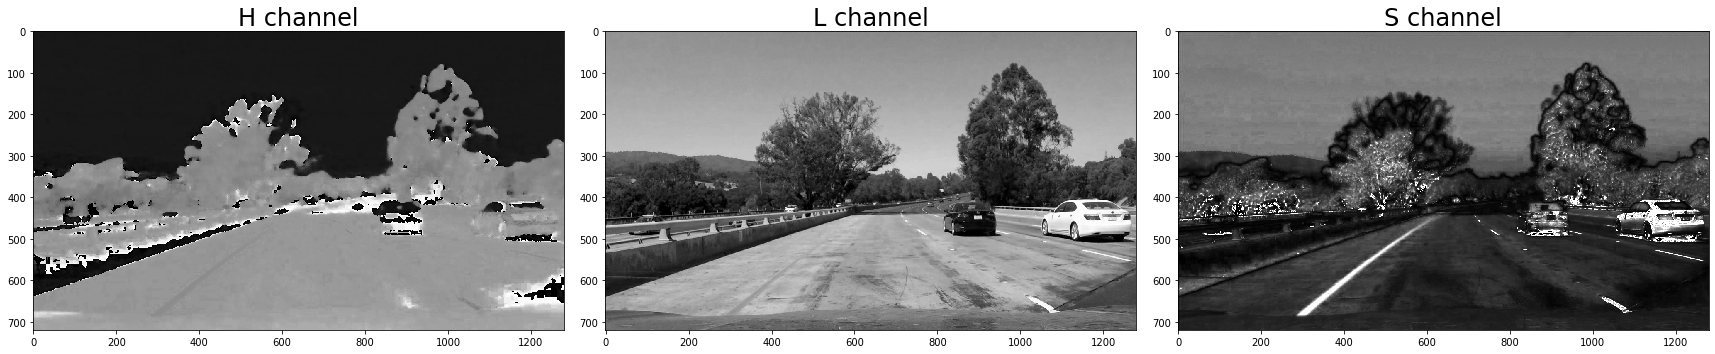

In [7]:
# 3.1: Color Transform
def RGB2HLS(imgIn):
    hls = cv2.cvtColor(imgIn, cv2.COLOR_RGB2HLS)
    h = hls[:,:,0]
    l = hls[:,:,1]
    s = hls[:,:,2]
    return h,l,s
h,l,s = RGB2HLS(imgTest)
f,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize = (24,9))
f.tight_layout(pad=3)
f.tight_layout()
ax1.set_title('H channel', fontsize=24)
ax1.imshow(h, cmap= 'gray')
ax2.set_title('L channel', fontsize=24)
ax2.imshow(l, cmap= 'gray')
ax3.set_title('S channel', fontsize=24)
ax3.imshow(s, cmap='gray')

---
## 4-Apply a perspective transform to rectify binary image ("birds-eye view").


---
## 5-Detect lane pixels and fit to find the lane boundary.


---
## 6-Determine the curvature of the lane and vehicle position with respect to center.


---
## 7-Warp the detected lane boundaries back onto the original image.


---
## 8-Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
